# setup


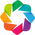

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
hv.extension('bokeh','matplotlib')

In [2]:
%%output backend='matplotlib'
%opts Overlay [legend_position='bottom']
%opts Points.R (color='r') Points.XY (color='blue') Points.XZ (color='green' size=5)

In [3]:
%%output backend='bokeh'
%opts Overlay [legend_position='bottom']
%opts Points.R (color='r') Points.XY (color='blue') Points.XZ (color='green' size=5)

In [4]:
def mk_vector(): return np.random.normal(size=100)
df = pd.DataFrame( dict( x = mk_vector(), y=mk_vector(), z=mk_vector()))
for i in range(5): df[str(i)] = mk_vector()

df.tail().round(2)

,x,y,z,0,1,2,3,4
95,-0.83,-1.61,-0.53,0.61,-0.17,1.15,0.30,-0.08
96,0.04,0.17,-0.94,1.58,-0.45,0.18,-0.93,-0.18
97,-1.11,0.04,-1.80,1.56,2.50,-0.40,0.11,-0.82
98,-1.27,0.80,-1.83,1.61,-0.14,-0.08,0.11,-2.33
99,1.76,-0.40,1.45,0.87,2.13,0.68,0.62,0.10


# example 1

In [5]:
import logging

def mk_view_1(use_z=True):
    h = hv.Points( df, kdims=['x', 'y'], group='XY', label='xy')*\
        hv.Points( (mk_vector(),mk_vector()), group='R', label='random')
    if use_z:
        h = h*hv.Points(df, kdims=['x', 'z'], group='XZ', label='xz')
        #logging.info('z')
    return h

# in the following, use_z is initialized to 0 - which python interprets as False
dmap_1=hv.DynamicMap(mk_view_1, kdims=['use_z']).redim.values(use_z=[True,False])
dmap_1

:DynamicMap   [use_z]

In [6]:
# This initializes use_z correctly, but changing the setting no longer works
hv.HoloMap(dmap_1)

:HoloMap   [use_z]
   :Overlay
      .XY.Xy    :Points   [x,y]   (z,0,1,2,3,4)
      .R.Random :Points   [x,y]

:DynamicMap   [use_z]
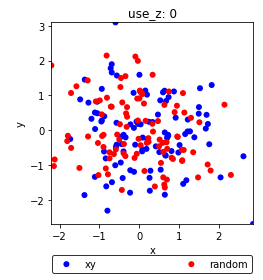

In [7]:
%%output backend='matplotlib'
# in this example, use_z is initialized to 0, selector can be changed once, has no effect thereafter
plt_dmap_1=hv.DynamicMap(mk_view_1, kdims=['use_z']).redim.values(use_z=[True,False])
plt_dmap_1

# example 2

In [8]:
%%opts Distribution {+framewise}

def mk_view_2(i, use_z=True):
    h = hv.Points( df, kdims=['x', 'y'], group='XY', label='xy')*\
        hv.Points( (mk_vector(),mk_vector()), group='R', label='random')
    if use_z:
        h = h*hv.Points(df, kdims=['x', 'z'], group='XZ', label='xz')
        #logging.info('z')

    return h+hv.Distribution( df[str(i)])

#use_z is correctly initialized to true, this example works as expected
dmap_2=hv.DynamicMap(mk_view_2, kdims=['i', 'use_z']).redim.values(i=np.arange(5), use_z=[True,False])
dmap_2

:DynamicMap   [i,use_z]

In [9]:
%%opts Distribution {+framewise}
# this fails: selectors do not work, trying to change i changes the use_z selector
hv.HoloMap(dmap_2)

:HoloMap   [i,use_z]
   :Layout
      .Overlay.I      :Overlay
         .XY.Xy    :Points   [x,y]   (z,0,1,2,3,4)
         .R.Random :Points   [x,y]
      .Distribution.I :Distribution   [Value]   (Density)

In [10]:
%%opts Distribution {+framewise}
# this fails too:
#  AttributeError: 'NoneType' object has no attribute 'clone'

dmap_3=hv.DynamicMap(mk_view_2, kdims=['i', 'use_z']).redim.values(i=np.arange(5), use_z=[True,False])
hv.HoloMap(dmap_3).collate()

AttributeError: 'NoneType' object has no attribute 'clone'

In [11]:
%%output backend='matplotlib'

# This produces an error:
# Exception: Some Elements returned by the dynamic callback were not initialized correctly and could not be rendered.
plt_dmap_2=hv.DynamicMap(mk_view_2, kdims=['i', 'use_z']).redim.values(i=np.arange(5), use_z=[True,False])
plt_dmap_2

Exception: Some Elements returned by the dynamic callback were not initialized correctly and could not be rendered.

:DynamicMap   [i,use_z]

# example 3

In [12]:
def mk_view_3(i,sigma,unused,use_z=True):
    h=\
    hv.Points( df, kdims=['x', 'y'], group='XY', label='xy')*\
    hv.Points( (df['1'],sigma*df['2']),  group='R', label='random')*\
    hv.Points( df, kdims=[str(i),str(i)],group='XZ', label='diagonal')
    if use_z:
        h = h*hv.Points(df, kdims=['x', 'z'], group='XZ', label='xz')
    return h
dmap_3 = hv.DynamicMap( mk_view_3, kdims=['i','sigma','unused','use_z'])\
          .redim.values(i=np.arange(5),sigma=[2.,3.5,5.], unused=[3,4,5], use_z=[True,False])

# this just produces a text representation:   :HoloMap   [i,sigma,unused,use_z]
hv.HoloMap(dmap_3)

:HoloMap   [i,sigma,unused,use_z]

In [13]:
%%output backend='matplotlib'
plt_dmap_3 = hv.DynamicMap( mk_view_3, kdims=['i','sigma','unused','use_z'])\
          .redim.values(i=np.arange(5),sigma=[2.,3.5,5.], unused=[3,4,5], use_z=[True,False])
# this just produces a text representation:   :HoloMap   [i,sigma,unused,use_z]
hv.HoloMap(plt_dmap_3)

:HoloMap   [i,sigma,unused,use_z]

# example 4

In [14]:
%%opts Histogram Distribution [invert_axes=True] {+framewise}
def mk_view_4(i,unused):
    h=\
    hv.Histogram(np.histogram(df[str(i)],normed=True),label='hist')*\
    hv.Distribution( df[str(i)], group='XY', label='xy')
    return h

dmap_4 = hv.DynamicMap( mk_view_4, kdims=['i','unused'])\
          .redim.values(i=np.arange(5), unused=[3,4,5])

if True:
    dmap = dmap_4
    # no legend for Distribution
    # would be nice to be able to change hist alpha by clicking on hist legend
else:
    dmap = dmap_4 + hv.HoloMap(dmap_4)
    # This does not work
    # interestingly, this displays the plot without inverting axes,
    # then redisplays it al ittle later in time with inverted axes
dmap

:DynamicMap   [i,unused]

In [15]:
# this displays, but the selector for i has no effect
hv.HoloMap(dmap_4)

:HoloMap   [i,unused]
   :Overlay
      .Histogram.Hist :Histogram   [x]   (Frequency)
      .XY.Xy          :Distribution   [Value]   (Density)

:Layout
   .DynamicMap.I :DynamicMap   [i,unused]
   .HoloMap.I    :HoloMap   [i,unused]
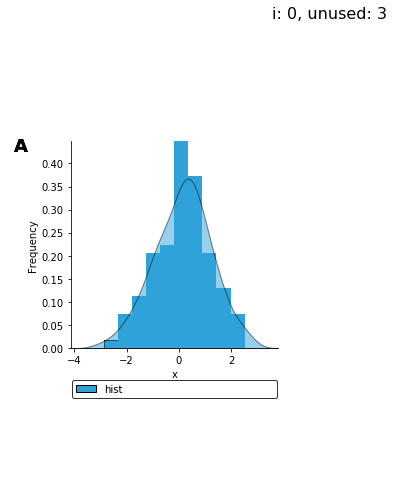
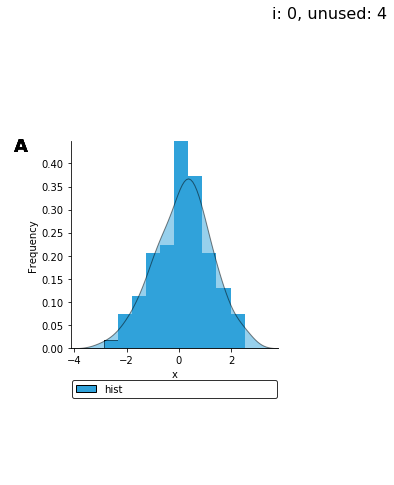
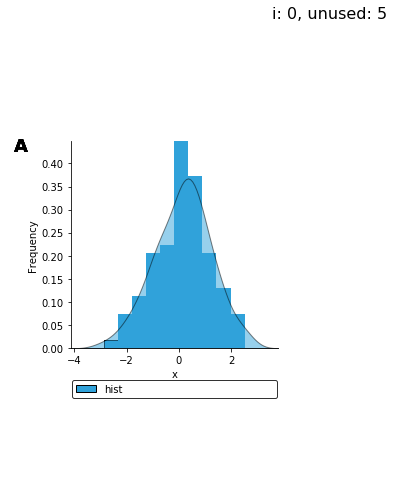
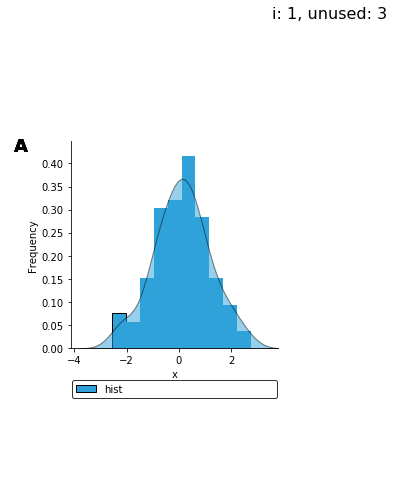
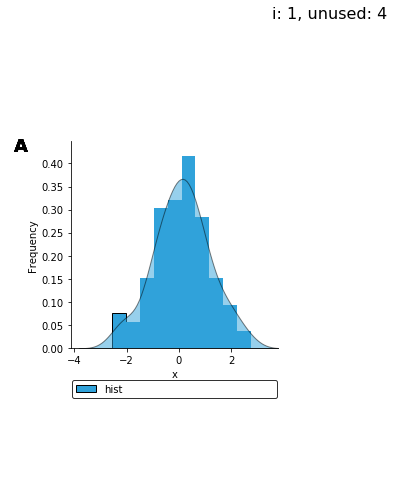
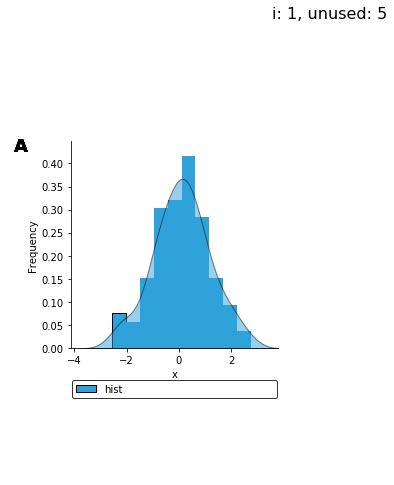
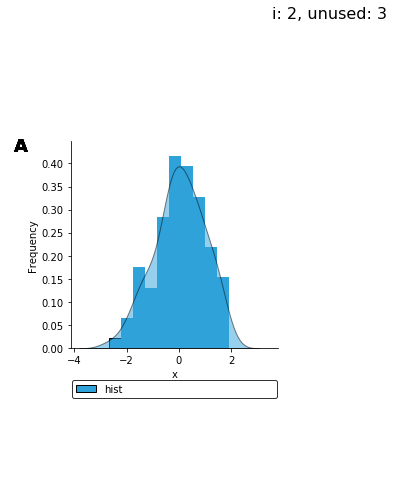
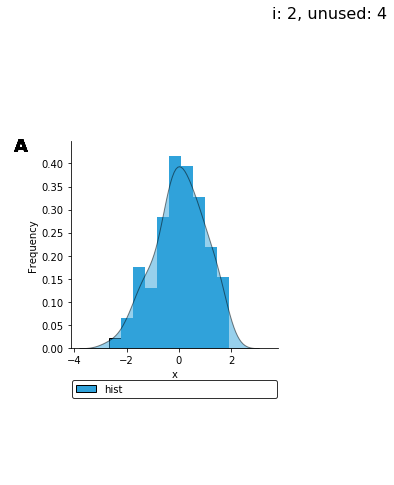
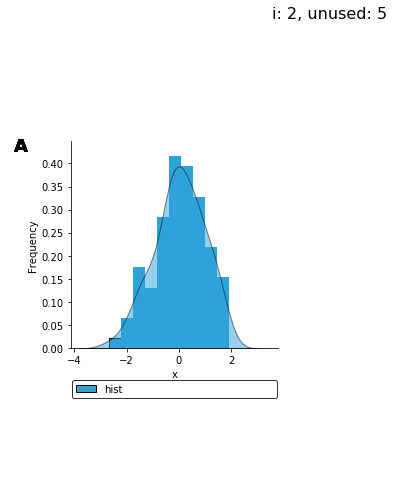
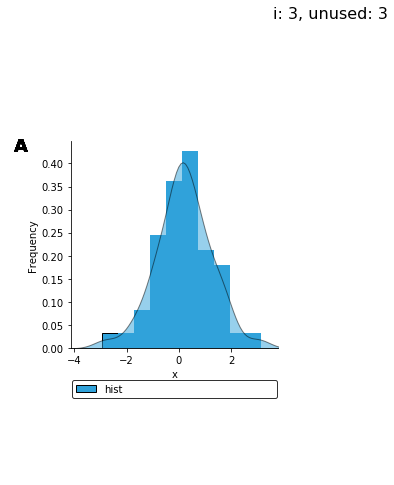
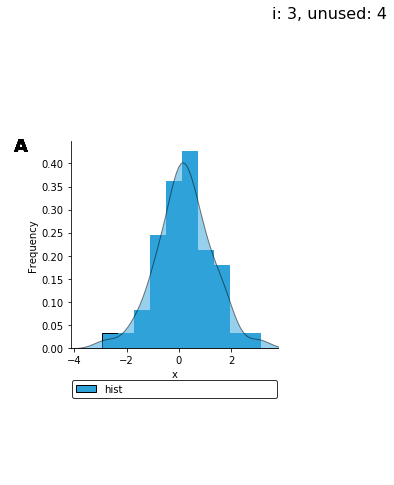
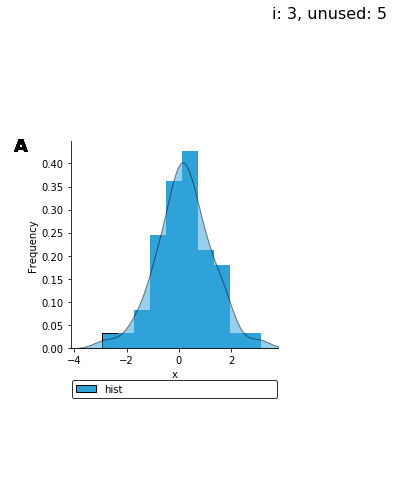
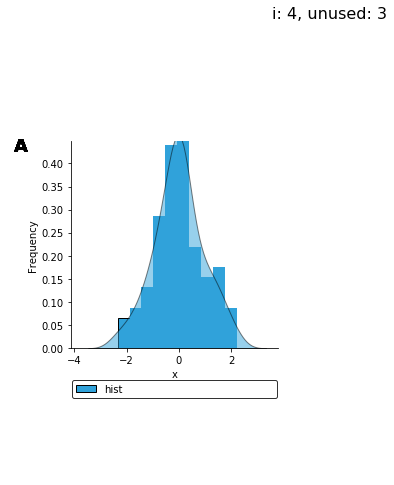
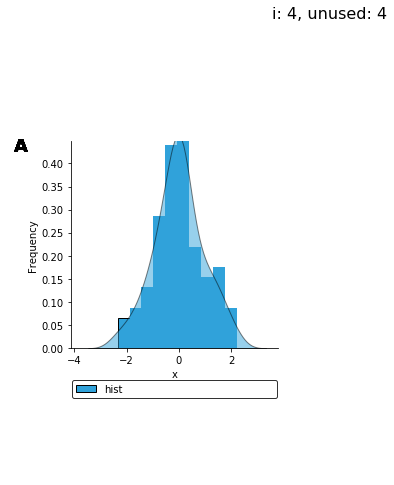
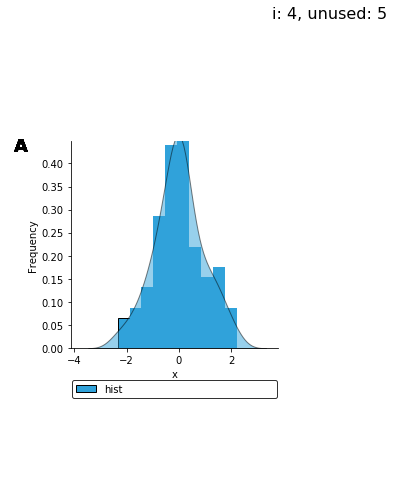

In [19]:
%%output backend='matplotlib'
plt_dmap_4 = hv.DynamicMap( mk_view_4, kdims=['i','unused'])\
          .redim.values(i=np.arange(5), unused=[3,4,5])

# plt_dmap_4 by itself works as expected
#    but this layout does not
plt_dmap_4 + hv.HoloMap(plt_dmap_4)

I have a weird case with actual data I can't yet reproduce:
> for one of the cases (i = 2), the inverted_axis=2 plot produces a vertical line,
yet when called directly, I get the expected Histogram... I'll try and see about reducing the data to a minimum

# example 5

In [17]:
%%opts Histogram Distribution [invert_axes=True width=200 yaxis=None] {+framewise}
%%opts Path (color='indianred', line_width=4)
%%opts DynamicMap [width=700]
#      ^^^^^^^^^^             seems to be honored, but produces a warning
def mk_view_5(i,unused):
    points = \
        hv.Points( df, kdims=['x', 'y'], group='XY', label='xy') *\
        hv.Points( (mk_vector(),mk_vector()), group='R', label='random')
    lines  = hv.Path([ [(-1, -1), (2,2), (-1,3), (3,-1), (3,2)] ],label='path')
    #                                                             ^^^^^^^^^^^^  legend not honored
    
    hist = hv.Histogram(np.histogram(df[str(i)],normed=True))*\
           hv.Distribution( df[str(i)], group='XY')

    return points*lines+hist
    #return points << hist  # does not work by itself

dmap_5 = hv.DynamicMap( mk_view_5, kdims=['i','unused'])\
          .redim.values(i=np.arange(5),unused=[0])
dmap_5

:DynamicMap   [i,unused]

:DynamicMap   [i,unused]
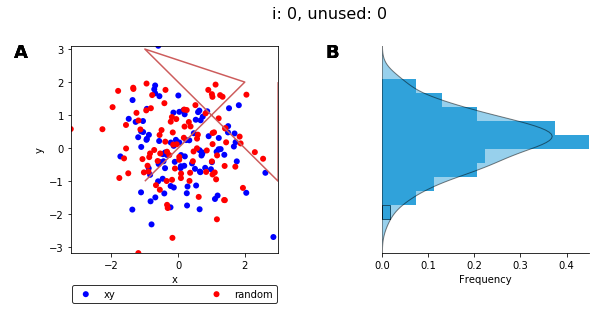

In [18]:
%%output backend='matplotlib' size=100
%%opts Histogram Distribution [invert_axes=True width=200 yaxis=None] {+framewise}
%%opts Path (color='indianred', line_width=4)

# with matplotlib, the smae graph works without any warnings!

plt_dmap_5 = hv.DynamicMap( mk_view_5, kdims=['i','unused'])\
          .redim.values(i=np.arange(5),unused=[0])
plt_dmap_5